<a href="https://colab.research.google.com/github/mulkihakim/PCVK_Ganjil_2024/blob/main/Week7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Praktikum FIlter

1. Buatlah fungsi konvolusi menggunakan algoritma yang telah dijelaskan pada Bagian C, tanpa
menggunakan library atau metode konvolusi dari OpenCV.

2. Berikut merupakan langkah-langkah yang dapat dilakukan:

    a. Buat notebook baru pada google colab, dan beri nama Week7.ipynb. Simpan Salinan pada akun github seperti pada modul sebelumnya.

  b. Akses file yang terdapat pada drive dan import beberapa library yang dibutuhkan

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import math
from google.colab.patches import cv2_imshow
from PIL import Image as im

  c. Buatlah fungsi konvolusi. Catatan: parameter yang digunakan boleh dimodifikasi. Misal, hanya menggunakan parameter image dan kernel saja, atau image, kernel, dan padding.

In [3]:
"""
    Melakukan operasi konvolusi 2D pada citra input dengan kernel yang diberikan.

    Parameters:
    - image (numpy.ndarray): Citra input dalam bentuk array 2D (grayscale).
    - kernel (numpy.ndarray): Kernel konvolusi dalam bentuk array 2D.
    - stride (int): Langkah pergeseran kernel (default=1).
    - padding (int): Jumlah padding yang akan ditambahkan di setiap sisi citra (default=0).

    Returns:
    - numpy.ndarray: Citra hasil konvolusi.
"""
def convolution2d(image, kernel, stride, padding):
  # Apply padding to the image
  image = np.pad(image, padding, mode='constant', constant_values=0)
  # Get image and kernel dimensions
  padded_height, padded_width = image.shape
  kernel_height, kernel_width = len(kernel), len(kernel[0])

  output_height = (padded_height - kernel_height) // stride + 1
  output_width = (padded_width - kernel_width) // stride + 1

  new_image = np.zeros((output_height, output_width))

  # operasi konvolusi
  for y in range(output_height):
    for x in range(output_width):
      new_image[y, x] = np.sum(image[y*stride:y*stride+kernel_height, x*stride:x*stride+kernel_width] * kernel)

  return new_image


  d. Load citra yang akan diproses dan ubah menjadi citra keabuan

In [4]:
img = cv.imread('/content/drive/MyDrive/Kuliah polinema/sem 5/PCVK/Images/female.tiff')
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

  e. Tentukan kernel yang akan digunakan, contohnya kernel untuk filter sharpening
sebagai berikut:

In [5]:
kernel_sharpen = np.array([
    [0,-1,0],
    [-1,5,-1],
    [0,-1,0]
])

  f. Memanggil fungsi konvolusi yang telah dibuat sebelumnya, dan menampilkan hasil
konvolusinya:

In [6]:
convolution2d(img_gray, kernel_sharpen, 1, 2)

array([[   0.,  -47.,  -42., ..., -134., -131.,    0.],
       [ -47.,  145.,   75., ...,  273.,  385., -131.],
       [ -48.,  105.,   47., ...,  131.,  287., -136.],
       ...,
       [  -9.,   11.,   15., ...,   98.,  227., -102.],
       [ -18.,   64.,   40., ...,  130.,  305.,  -96.],
       [   0.,  -18.,  -17., ...,  -73.,  -96.,    0.]])

3. Buat Image Filter untuk Average filter, low pass filter, high pass filter, dan beberapa filter
berikut:

* Sharpen

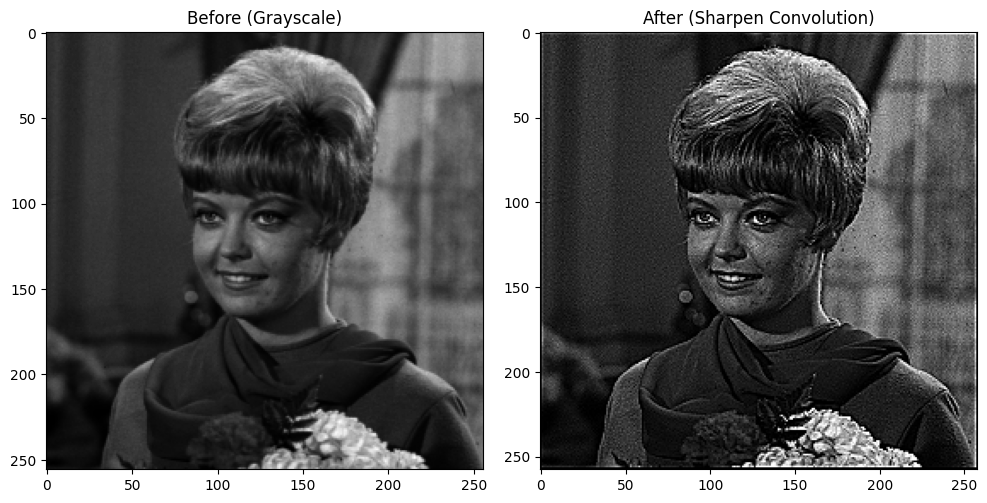

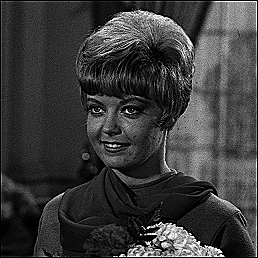

In [7]:
sharpened_image = convolution2d(img_gray, kernel_sharpen, 1, 2)

# Mengubah sharpened_image menjadi tipe uint8 agar sesuai dengan tampilan dari cv2_imshow
sharpened_image_uint8 = np.clip(sharpened_image, 0, 255).astype(np.uint8)

# Menampilkan gambar sebelum dan sesudah konvolusi dengan axis
plt.figure(figsize=(10, 5))

# Menampilkan gambar original (grayscale)
plt.subplot(1, 2, 1)
plt.imshow(img_gray, cmap='gray')
plt.title('Before (Grayscale)')

# Menampilkan gambar setelah sharpen convolution
plt.subplot(1, 2, 2)
plt.imshow(sharpened_image_uint8, cmap='gray')
plt.title('After (Sharpen Convolution)')

# Menampilkan plot
plt.tight_layout()
plt.show()
# memastikan dengan cv2_imshow
cv2_imshow(sharpened_image)

* Emboss

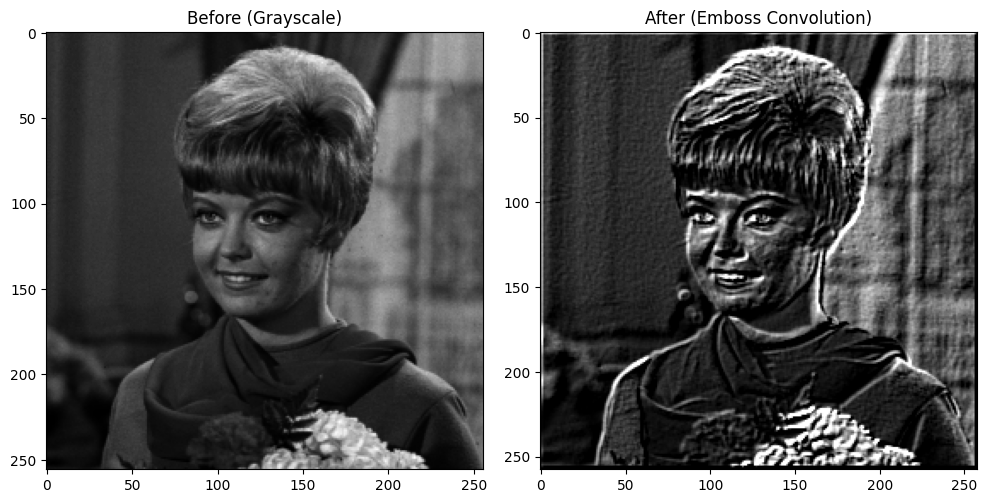

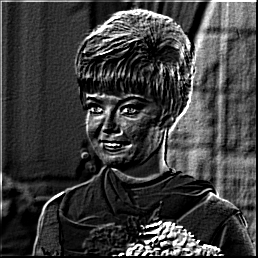

In [8]:
kernel_emboss = np.array([
    [-2,-1,0],
    [-1,1,1],
    [0,1,2]
])

embossed_image = convolution2d(img_gray, kernel_emboss, 1, 2)

embossed_image_uint8 = np.clip(embossed_image, 0, 255).astype(np.uint8)

# Menampilkan gambar sebelum dan sesudah konvolusi dengan axis
plt.figure(figsize=(10, 5))

# Menampilkan gambar original (grayscale)
plt.subplot(1, 2, 1)
plt.imshow(img_gray, cmap='gray')
plt.title('Before (Grayscale)')

# Menampilkan gambar setelah sharpen convolution
plt.subplot(1, 2, 2)
plt.imshow(embossed_image_uint8, cmap='gray')
plt.title('After (Emboss Convolution)')

# Menampilkan plot
plt.tight_layout()
plt.show()
# memastikan dengan cv2_imshow
cv2_imshow(embossed_image)

* Left Sobel
Edge
Detection

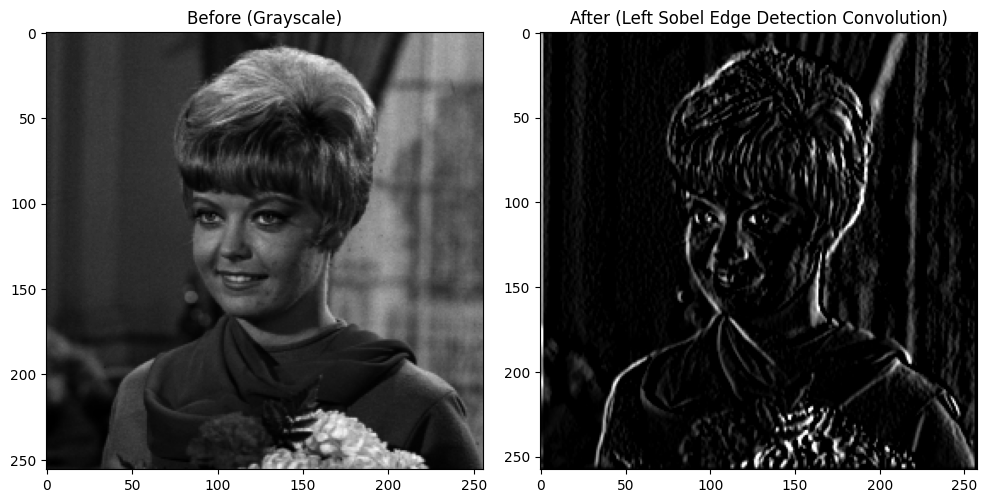

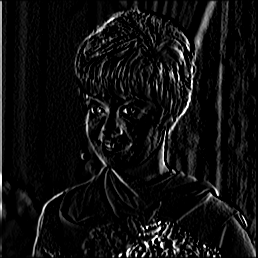

In [9]:
kernel_leftSobelEdgeDetection = np.array([
    [-1,0,1],
    [-2,0,2],
    [-1,0,1]
])

leftSobelEdgeDetection_image = convolution2d(img_gray, kernel_leftSobelEdgeDetection, 1, 2)

leftSobelEdgeDetection_image_uint8 = np.clip(leftSobelEdgeDetection_image, 0, 255).astype(np.uint8)

# Menampilkan gambar sebelum dan sesudah konvolusi dengan axis
plt.figure(figsize=(10, 5))

# Menampilkan gambar original (grayscale)
plt.subplot(1, 2, 1)
plt.imshow(img_gray, cmap='gray')
plt.title('Before (Grayscale)')

# Menampilkan gambar setelah sharpen convolution
plt.subplot(1, 2, 2)
plt.imshow(leftSobelEdgeDetection_image_uint8, cmap='gray')
plt.title('After (Left Sobel Edge Detection Convolution)')

# Menampilkan plot
plt.tight_layout()
plt.show()
# memastikan dengan cv2_imshow
cv2_imshow(leftSobelEdgeDetection_image)

* Canny
Edge
Detection

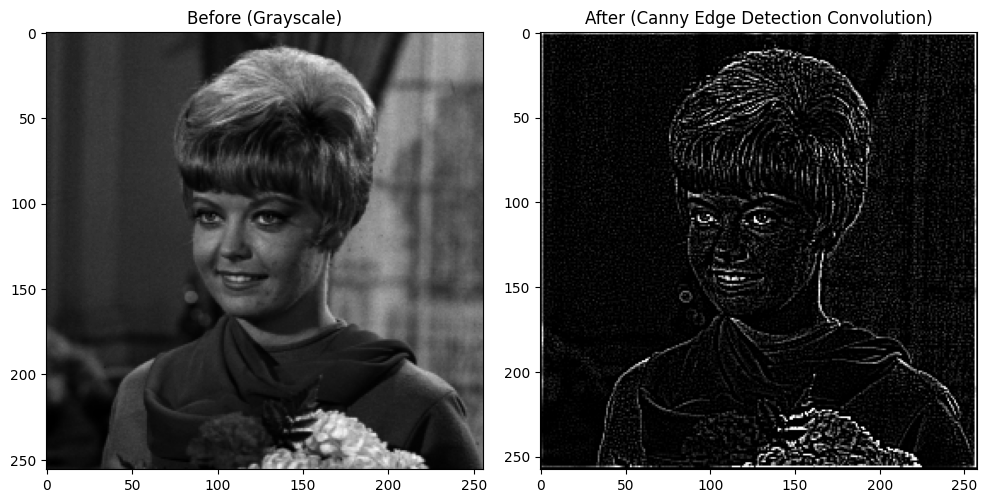

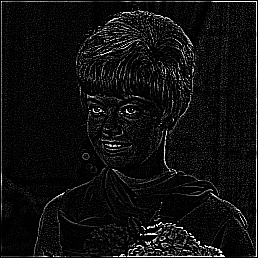

In [10]:
kernel_cannyEdgeDetection = np.array([
    [-1,-1,-1],
    [-1,8,-1],
    [-1,-1,-1]
])

cannyEdgeDetection_image = convolution2d(img_gray, kernel_cannyEdgeDetection, 1, 2)

cannyEdgeDetection_image_uint8 = np.clip(cannyEdgeDetection_image, 0, 255).astype(np.uint8)

# Menampilkan gambar sebelum dan sesudah konvolusi dengan axis
plt.figure(figsize=(10, 5))

# Menampilkan gambar original (grayscale)
plt.subplot(1, 2, 1)
plt.imshow(img_gray, cmap='gray')
plt.title('Before (Grayscale)')

# Menampilkan gambar setelah sharpen convolution
plt.subplot(1, 2, 2)
plt.imshow(cannyEdgeDetection_image_uint8, cmap='gray')
plt.title('After (Canny Edge Detection Convolution)')

# Menampilkan plot
plt.tight_layout()
plt.show()
# memastikan dengan cv2_imshow
cv2_imshow(cannyEdgeDetection_image)

* Prewitt
Edge
Detection

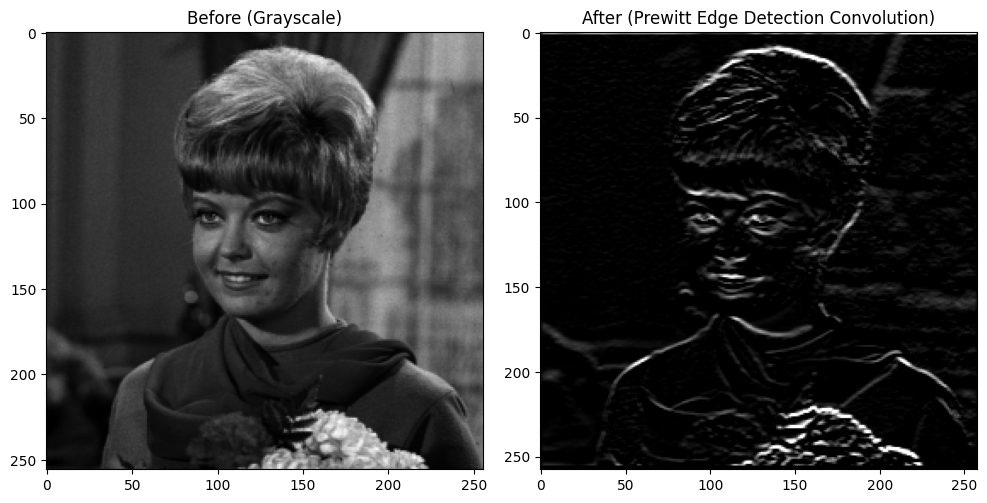

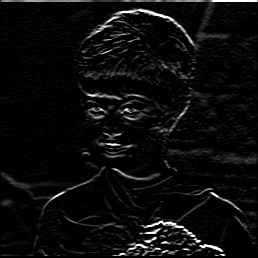

In [11]:
kernel_prewittEdgeDetection = np.array([
    [-1,-1,-1],
    [0,0,0],
    [1,1,1]
])

prewittEdgeDetection_image = convolution2d(img_gray, kernel_prewittEdgeDetection, 1, 2)

prewittEdgeDetection_image_uint8 = np.clip(prewittEdgeDetection_image, 0, 255).astype(np.uint8)

# Menampilkan gambar sebelum dan sesudah konvolusi dengan axis
plt.figure(figsize=(10, 5))

# Menampilkan gambar original (grayscale)
plt.subplot(1, 2, 1)
plt.imshow(img_gray, cmap='gray')
plt.title('Before (Grayscale)')

# Menampilkan gambar setelah sharpen convolution
plt.subplot(1, 2, 2)
plt.imshow(prewittEdgeDetection_image_uint8, cmap='gray')
plt.title('After (Prewitt Edge Detection Convolution)')

# Menampilkan plot
plt.tight_layout()
plt.show()
# memastikan dengan cv2_imshow
cv2_imshow(prewittEdgeDetection_image)

* 5x5
Gaussian
Blur

Kernel Gaussian 5x5 (dikali 1/256):
 [[0.00390625 0.015625   0.0234375  0.015625   0.00390625]
 [0.015625   0.0625     0.09375    0.0625     0.015625  ]
 [0.0234375  0.09375    0.140625   0.09375    0.0234375 ]
 [0.015625   0.0625     0.09375    0.0625     0.015625  ]
 [0.00390625 0.015625   0.0234375  0.015625   0.00390625]]


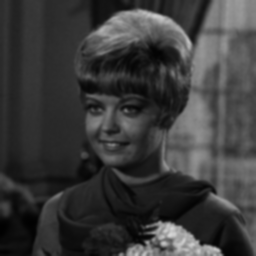

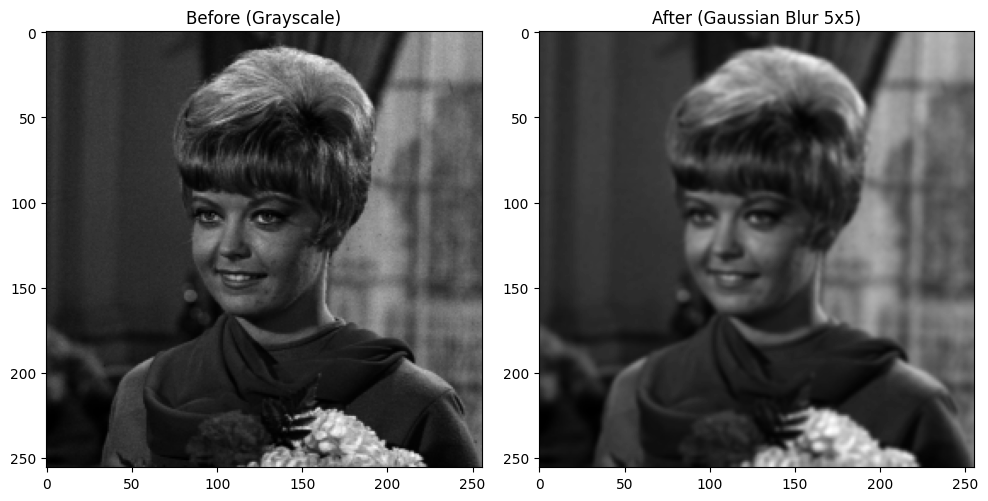

In [12]:
# Definisi kernel Gaussian blur 5x5
gaussian_kernel_5x5 = np.array([[1, 4, 6, 4, 1],
                                [4, 16, 24, 16, 4],
                                [6, 24, 36, 24, 6],
                                [4, 16, 24, 16, 4],
                                [1, 4, 6, 4, 1]])

# Menormalkan kernel dengan membagi semua elemen dengan 256
gaussian_kernel_5x5 = gaussian_kernel_5x5 / 256.0

print("Kernel Gaussian 5x5 (dikali 1/256):\n", gaussian_kernel_5x5)

# Menerapkan Gaussian blur dengan kernel 5x5
blurred_image_5x5 = cv.filter2D(img_gray, -1, gaussian_kernel_5x5)

# Mengonversi hasil menjadi tipe uint8 untuk konsistensi dengan OpenCV
blurred_image_5x5_uint8 = np.clip(blurred_image_5x5, 0, 255).astype(np.uint8)

# Menampilkan dengan OpenCV (cv2_imshow)
cv2_imshow(blurred_image_5x5)

# Menampilkan hasil sebelum dan sesudah Gaussian blur 5x5
plt.figure(figsize=(10, 5))

# Menampilkan gambar original (grayscale)
plt.subplot(1, 2, 1)
plt.imshow(img_gray, cmap='gray')
plt.title('Before (Grayscale)')

# Menampilkan gambar setelah Gaussian blur 5x5
plt.subplot(1, 2, 2)
plt.imshow(blurred_image_5x5_uint8, cmap='gray')
plt.title('After (Gaussian Blur 5x5)')

# Menampilkan plot
plt.tight_layout()
plt.show()

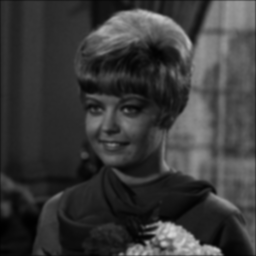

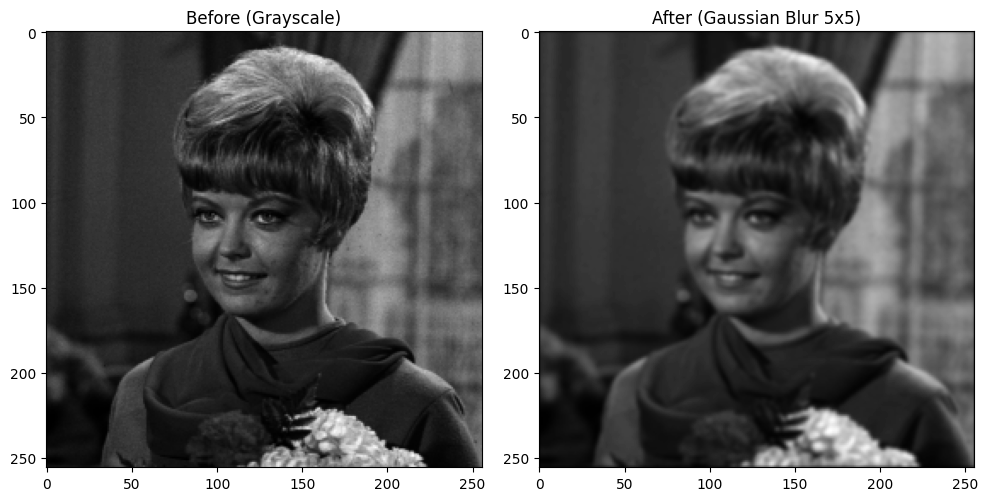

In [22]:
gaussian_kernel_5x5 = np.array([[1, 4, 6, 4, 1],
                                [4, 16, 24, 16, 4],
                                [6, 24, 36, 24, 6],
                                [4, 16, 24, 16, 4],
                                [1, 4, 6, 4, 1]])

# Normalisasi kernel
gaussian_kernel_5x5 = gaussian_kernel_5x5 / 256.0

gaussian_blur_image = convolution2d(img_gray, gaussian_kernel_5x5, 1, 2)

gaussian_blur_image_uint8 = np.clip(gaussian_blur_image, 0, 255).astype(np.uint8)

cv2_imshow(gaussian_blur_image)

# Menampilkan hasil sebelum dan sesudah Gaussian blur 5x5
plt.figure(figsize=(10, 5))

# Menampilkan gambar original (grayscale)
plt.subplot(1, 2, 1)
plt.imshow(img_gray, cmap='gray')
plt.title('Before (Grayscale)')

# Menampilkan gambar setelah Gaussian blur 5x5
plt.subplot(1, 2, 2)
plt.imshow(gaussian_blur_image_uint8, cmap='gray')
plt.title('After (Gaussian Blur 5x5)')

# Menampilkan plot
plt.tight_layout()
plt.show()

* 21x21
Gaussian
Blur


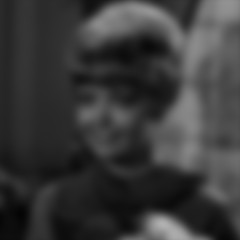

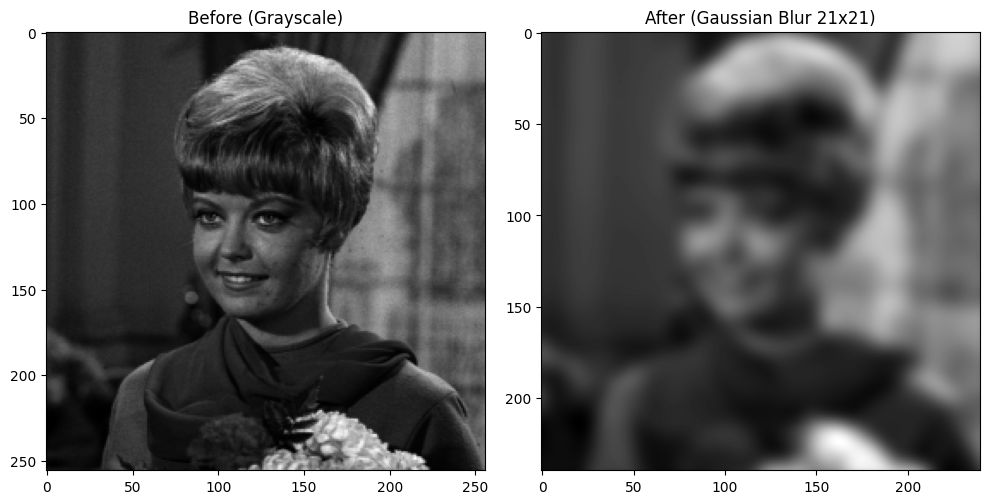

In [18]:
sigma = math.sqrt(21)
gaussian_kernel = cv.getGaussianKernel(21, sigma)
gauss_kernel = gaussian_kernel @ gaussian_kernel.transpose()
# Menerapkan Gaussian blur dengan fungsi konvolusi
gaussian_blur_image = convolution2d(img_gray, gauss_kernel, 1, 2)

cv2_imshow(gaussian_blur_image)

# Menampilkan hasil dengan plt
plt.figure(figsize=(10, 5))

# Menampilkan gambar original (grayscale)
plt.subplot(1, 2, 1)
plt.imshow(img_gray, cmap='gray')
plt.title('Before (Grayscale)')
plt.axis('on')

# Menampilkan gambar setelah Gaussian blur
plt.subplot(1, 2, 2)
plt.imshow(gaussian_blur_image, cmap='gray')
plt.title('After (Gaussian Blur 21x21)')
plt.axis('on')

# Menampilkan plot
plt.tight_layout()
plt.show()